In [27]:
import numpy as np
import matplotlib.pyplot as plt

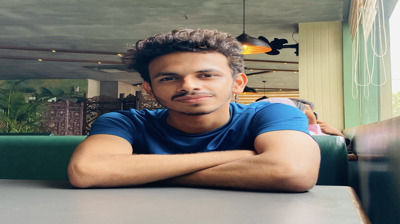

In [28]:
from PIL import Image
image = Image.open("Datasets/FaaizBinKasim.JPG")
image_resized = image.resize((400, 224))
image
image_resized


NORMALIZING


In [29]:
import numpy as np
image_array = np.array(image) / 255.0  # Normalize to [0, 1]
image_array

array([[[0.48627451, 0.50980392, 0.47058824],
        [0.48235294, 0.50588235, 0.46666667],
        [0.47843137, 0.50196078, 0.4627451 ],
        ...,
        [0.95294118, 0.95294118, 0.96078431],
        [0.94901961, 0.94901961, 0.95686275],
        [0.94901961, 0.95686275, 0.95294118]],

       [[0.48235294, 0.50588235, 0.46666667],
        [0.47843137, 0.50196078, 0.4627451 ],
        [0.47843137, 0.50196078, 0.4627451 ],
        ...,
        [0.95294118, 0.95294118, 0.96078431],
        [0.94901961, 0.94901961, 0.95686275],
        [0.94901961, 0.95686275, 0.95294118]],

       [[0.4745098 , 0.49803922, 0.45882353],
        [0.4745098 , 0.49803922, 0.45882353],
        [0.4745098 , 0.49803922, 0.45882353],
        ...,
        [0.95294118, 0.95294118, 0.96078431],
        [0.95294118, 0.95294118, 0.96078431],
        [0.94901961, 0.95686275, 0.95294118]],

       ...,

       [[0.69019608, 0.69019608, 0.68235294],
        [0.69019608, 0.69019608, 0.68235294],
        [0.69019608, 0

In [30]:
np.array(image)

array([[[124, 130, 120],
        [123, 129, 119],
        [122, 128, 118],
        ...,
        [243, 243, 245],
        [242, 242, 244],
        [242, 244, 243]],

       [[123, 129, 119],
        [122, 128, 118],
        [122, 128, 118],
        ...,
        [243, 243, 245],
        [242, 242, 244],
        [242, 244, 243]],

       [[121, 127, 117],
        [121, 127, 117],
        [121, 127, 117],
        ...,
        [243, 243, 245],
        [243, 243, 245],
        [242, 244, 243]],

       ...,

       [[176, 176, 174],
        [176, 176, 174],
        [176, 176, 174],
        ...,
        [ 16,  38,  51],
        [ 15,  37,  50],
        [ 14,  36,  49]],

       [[177, 177, 175],
        [177, 177, 175],
        [176, 176, 174],
        ...,
        [ 16,  38,  51],
        [ 16,  38,  51],
        [ 12,  34,  47]],

       [[176, 176, 174],
        [176, 176, 174],
        [176, 176, 174],
        ...,
        [ 14,  38,  50],
        [ 11,  35,  47],
        [ 10,  34,  46]]

Color Conversion

[[126 125 124 ... 244 243 243]
 [125 124 124 ... 244 243 243]
 [123 123 123 ... 244 244 243]
 ...
 [175 175 175 ...  39  38  37]
 [176 176 175 ...  39  39  35]
 [175 175 175 ...  39  36  35]]


(-0.5, 2128.5, 2128.5, -0.5)

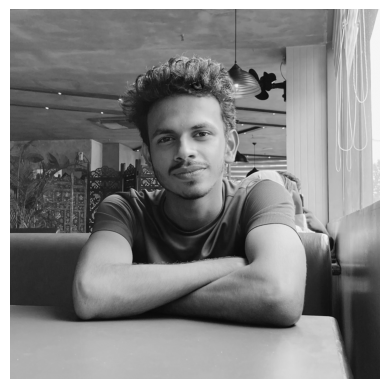

In [31]:
from cv2 import cvtColor, COLOR_BGR2GRAY
image_np=np.array(image)
grayscale_image=cvtColor(image_np,COLOR_BGR2GRAY)
print(grayscale_image)

plt.imshow(grayscale_image,cmap="gray")
plt.axis("off") 


DATA AUGMENTATION

In [32]:
from PIL import Image, ImageEnhance, ImageOps
import os

In [33]:
image_path="Datasets/FaaizBinKasim.JPG"

image=Image.open(image_path)

augmented_dir="augmented_images"


os.makedirs(augmented_dir,exist_ok=True)

def augment_image(image, output_dir):
    flipped =ImageOps.mirror(image)
    flipped.save(os.path.join(output_dir,"flipped.jpeg"))


    rotated=image.rotate(30)
    rotated.save(os.path.join(output_dir,"rotated.jpeg"))

    enhancer=ImageEnhance.Brightness(image)
    brighter=enhancer.enhance(1.5)
    brighter.save(os.path.join(output_dir,"brighter.jpeg"))

    contrast = ImageEnhance.Contrast(image).enhance(2.0)
    contrast.save(os.path.join(output_dir, "contrast.jpeg"))

    grayscale = ImageOps.grayscale(image)
    grayscale.save(os.path.join(output_dir, "grayscale.jpeg"))



augment_image(image, augmented_dir)
print("Augmented images saved in:", augmented_dir)
print("Generated files:", os.listdir(augmented_dir))



Augmented images saved in: augmented_images
Generated files: ['brighter.jpeg', 'contrast.jpeg', 'flipped.jpeg', 'grayscale.jpeg', 'rotated.jpeg']


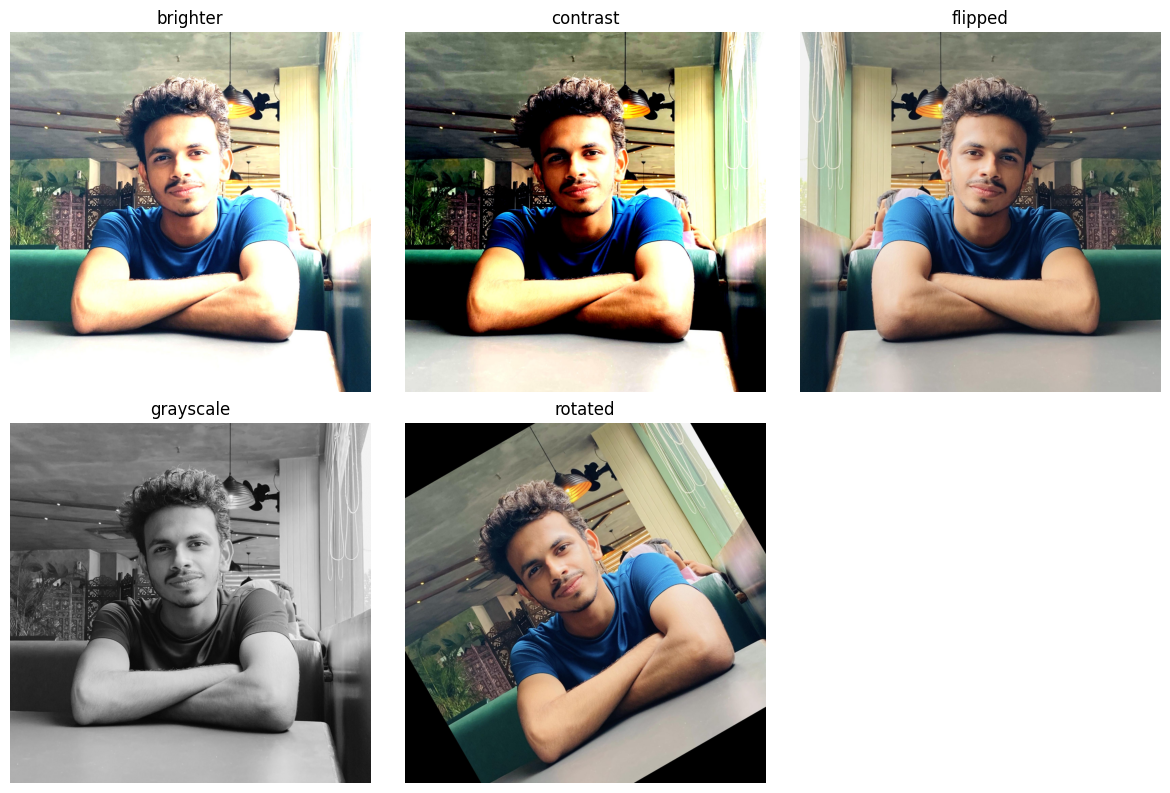

In [34]:
augmented_images = os.listdir(augmented_dir)

plt.figure(figsize=(12, 8)) 

for i, img_file in enumerate(augmented_images):
    img_path = os.path.join(augmented_dir, img_file)
    img = Image.open(img_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap="gray" if img.mode == "L" else None)
    plt.title(img_file.split('.')[0]) 
    plt.axis("off") 

plt.tight_layout()
plt.show()

IMAGE FILTERS

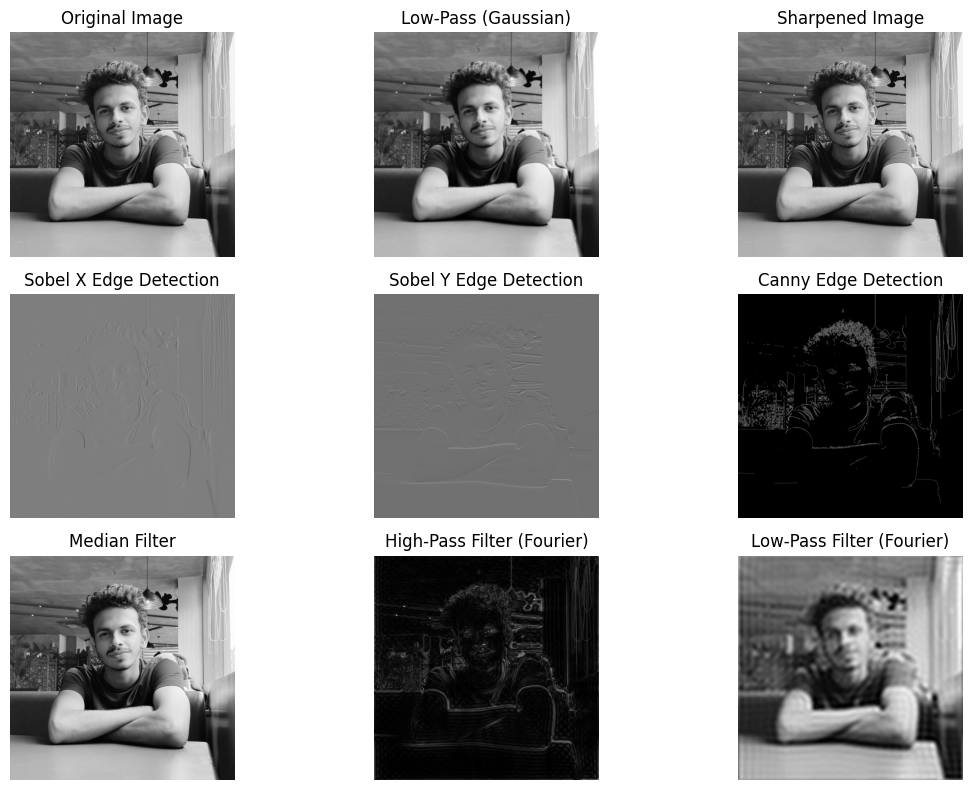

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(image_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


low_pass = cv2.GaussianBlur(gray, (15, 15), 0)



sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened = cv2.filter2D(gray, -1, sharpening_kernel)

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  
edges = cv2.Canny(gray, 100, 200) 

median_filtered = cv2.medianBlur(gray, 5)



dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2

mask = np.ones((rows, cols, 2), np.uint8)

r = 30  
mask[crow - r:crow + r, ccol - r:ccol + r] = 0

high_pass = dft_shift * mask
f_ishift = np.fft.ifftshift(high_pass)

img_highpass = cv2.idft(f_ishift)

img_highpass = cv2.magnitude(img_highpass[:, :, 0], img_highpass[:, :, 1])


mask = np.zeros((rows, cols, 2), np.uint8)

mask[crow - r:crow + r, ccol - r:ccol + r] = 1

low_pass = dft_shift * mask

f_ishift = np.fft.ifftshift(low_pass)

img_lowpass = cv2.idft(f_ishift)
img_lowpass = cv2.magnitude(img_lowpass[:, :, 0], img_lowpass[:, :, 1])




plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1), plt.imshow(gray, cmap='gray')
plt.title("Original Image"), plt.axis("off")
plt.subplot(3, 3, 2), plt.imshow(cv2.GaussianBlur(gray, (15, 15), 0), cmap='gray')

plt.title("Low-Pass (Gaussian)"), plt.axis("off")

plt.subplot(3, 3, 3), plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened Image"), plt.axis("off")

plt.subplot(3, 3, 4), plt.imshow(sobelx, cmap='gray')
plt.title("Sobel X Edge Detection"), plt.axis("off")

plt.subplot(3, 3, 5), plt.imshow(sobely, cmap='gray')
plt.title("Sobel Y Edge Detection"), plt.axis("off")

plt.subplot(3, 3, 6), plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection"), plt.axis("off")

plt.subplot(3, 3, 7), plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter"), plt.axis("off")

plt.subplot(3, 3, 8), plt.imshow(img_highpass, cmap='gray')
plt.title("High-Pass Filter (Fourier)"), plt.axis("off")

plt.subplot(3, 3, 9), plt.imshow(img_lowpass, cmap='gray')
plt.title("Low-Pass Filter (Fourier)"), plt.axis("off")

plt.tight_layout()
plt.show()


IMAGE EXTRACTION

SIFT Feature Extraction using OpenCV

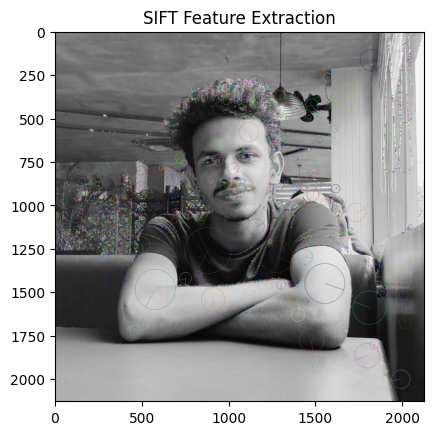

In [36]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
sift = cv2.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(image, None)
output_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



plt.imshow(output_image, cmap="gray")
plt.title("SIFT Feature Extraction")
plt.show()


HOG (Histogram of Oriented Gradients) using Scikit-Image

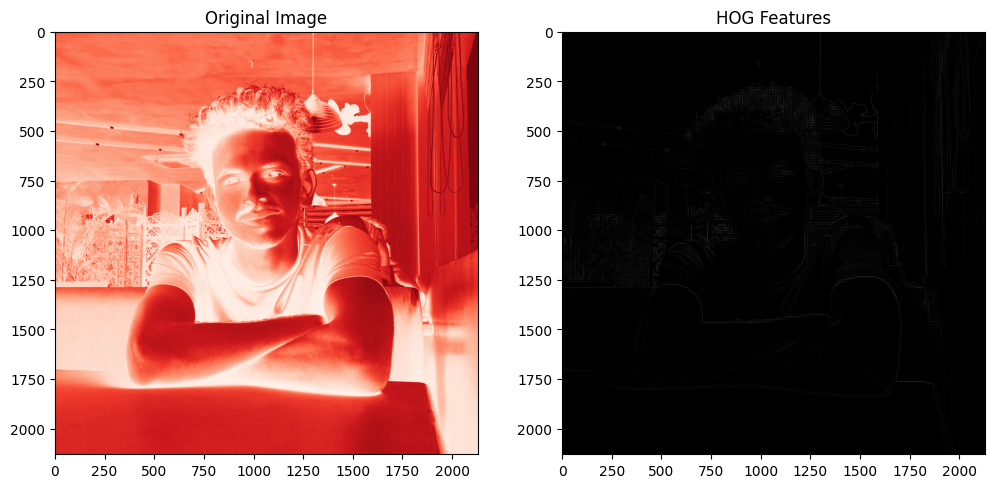

In [37]:
from skimage.feature import hog
from skimage import color, io
import matplotlib.pyplot as plt



image = io.imread(image_path)
gray_image = color.rgb2gray(image)



hog_features, hog_image = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(gray_image, cmap="Reds")
ax[0].set_title("Original Image")
ax[1].imshow(hog_image, cmap="gray")
ax[1].set_title("HOG Features")
plt.show()


Deep Learning-Based Feature Extraction

(a) Using Pretrained CNNs (TensorFlow/Keras)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


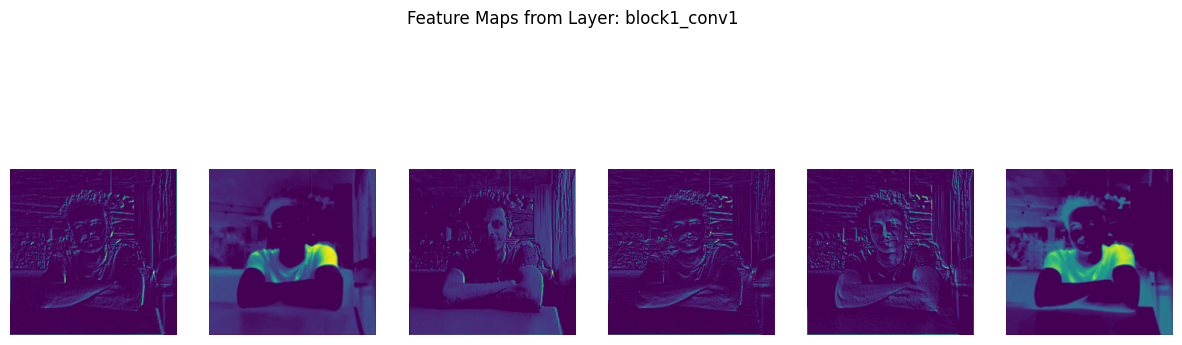

In [38]:

import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import tensorflow as tf



model = VGG16(weights="imagenet", include_top=False)
layer_name = "block1_conv1"

layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)




img = image.load_img(image_path, target_size=(224, 224))

img_array = image.img_to_array(img)


img_array = np.expand_dims(img_array, axis=0)


img_array = preprocess_input(img_array)


feature_maps = layer_model.predict(img_array)



num_filters = min(6, feature_maps.shape[-1])

fig, axes = plt.subplots(1, num_filters, figsize=(15, 5))

for i in range(num_filters):
    axes[i].imshow(feature_maps[0, :, :, i], cmap="viridis")

    axes[i].axis("off")

plt.suptitle(f"Feature Maps from Layer: {layer_name}")
plt.show()


Using Pretrained CNNs (PyTorch)

c:\Users\FAZIL K FAAZI\Desktop\Aesthetix\Machine learning\general_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\FAZIL K FAAZI\Desktop\Aesthetix\Machine learning\general_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\FAZIL K FAAZI/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:09<00:00, 11.3MB/s]


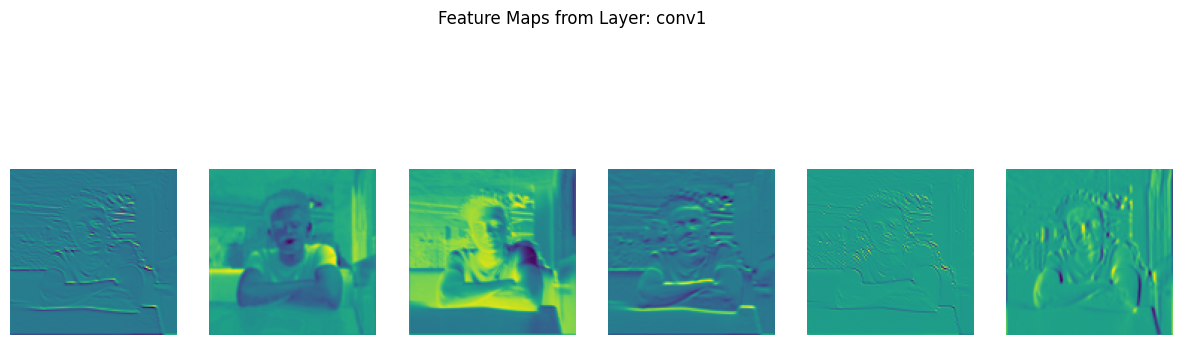

In [39]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
model = models.resnet50(pretrained=True)
model.eval() 

layer_name = 'conv1'

activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
        
    return hook

model.conv1.register_forward_hook(get_activation(layer_name))


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


img_path = image_path
img = Image.open(img_path)
img = transform(img).unsqueeze(0)


_ = model(img)


feature_maps = activation[layer_name].squeeze(0)


num_filters = min(6, feature_maps.shape[0]) 
fig, axes = plt.subplots(1, num_filters, figsize=(15, 5))

for i in range(num_filters):
    axes[i].imshow(feature_maps[i].cpu().numpy(), cmap="viridis")
    axes[i].axis("off")

plt.suptitle(f"Feature Maps from Layer: {layer_name}")
plt.show()
